 #                             Kaggle Competition: EDSA Apple Prices Challenge

In this notebook we will focus on:
 - Data cleaning an fromatting (confirmatory data analysis)
 - Evaluate the best model on the testing set

**Getting started**

In [5]:
#import libraries
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#import pandas_profiling as pp
import pickle
from scipy.stats import norm
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from scipy import stats
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
#pip install pandas_pro

Now we will load the train data set of the EDSA Apple Prices Challenge

In [6]:
# load train set
df_train = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")
df_test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [4]:
# load train set
#df_train= pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")

In [5]:
#df_test = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv") 

In [6]:
# First view of the train set
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [7]:
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [7]:
df_train = df_train[df_train.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]

df_test =df_test[df_test.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]

In [9]:
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55


In [10]:
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


# Check for null values.

In [11]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [12]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [13]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [14]:
df_test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


# Remove features that are not needed.

In [8]:
df_train = df_train.drop("Commodities", axis = "columns")

In [9]:
df_test = df_test.drop("Commodities", axis = "columns")

In [17]:
df_train.head(1)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [18]:
df_test.head(1)

,Index,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0


# Transform non numeric data types to numeric.

In [10]:
Region = LabelEncoder()
Apple_Container = LabelEncoder()
Grade = LabelEncoder()

In [11]:
df_train["Province_n"] = Region.fit_transform(df_train["Province"])
df_train["Container_n"] = Apple_Container.fit_transform(df_train["Container"])
df_train["Size_Grade_n"] = Grade.fit_transform(df_train["Size_Grade"])

In [12]:
df_test["Province_n"] = Region.fit_transform(df_test["Province"])
df_test["Container_n"] = Apple_Container.fit_transform(df_test["Container"])
df_test["Size_Grade_n"] = Grade.fit_transform(df_test["Size_Grade"])

# Drop features that you do not need anymore.

In [13]:
df_train = df_train.drop(["Province", "Container", "Size_Grade", "Date"], axis = "columns")

In [14]:
df_test = df_test.drop(["Province", "Container", "Size_Grade", "Date"], axis = "columns")

# Check for outliers in your data.

In [24]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_n,Container_n,Size_Grade_n
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,1.778176,5.450820,3.376537
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,2.301577,2.399949,2.539715
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,0.000000,3.000000,1.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,0.000000,6.000000,2.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,5.000000,8.000000,6.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,6.000000,10.000000,9.000000


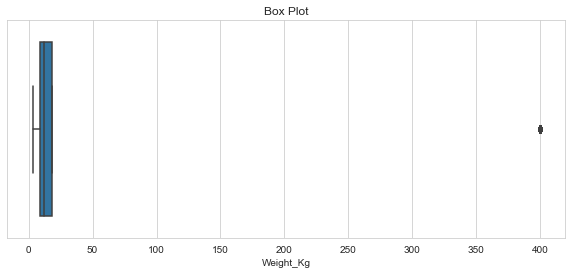

In [25]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(df_train['Weight_Kg'])

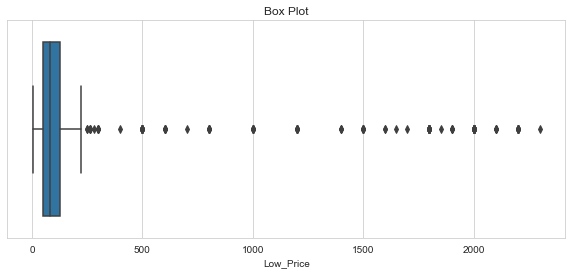

In [26]:
Box_plots(df_train['Low_Price'])

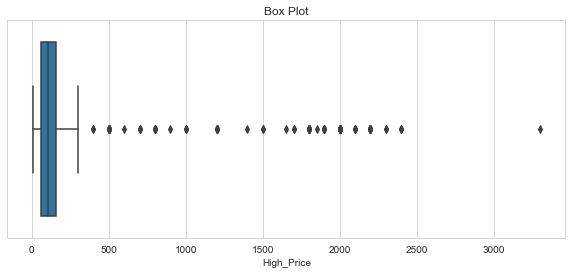

In [27]:
Box_plots(df_train['High_Price'])

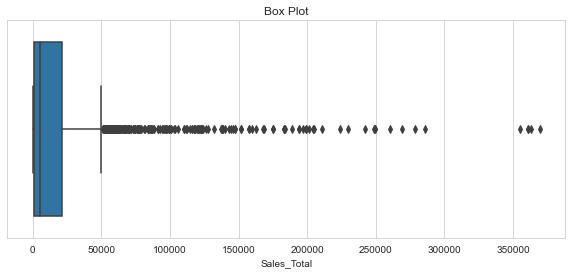

In [28]:
Box_plots(df_train['Sales_Total'])

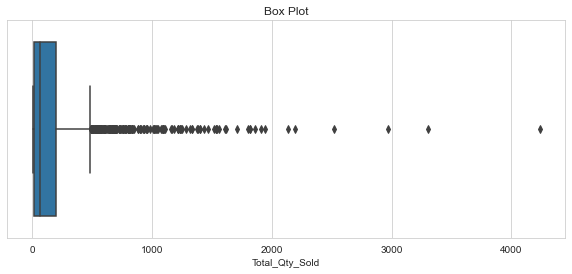

In [29]:
Box_plots(df_train['Total_Qty_Sold'])

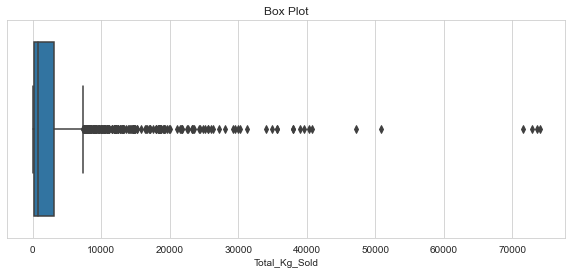

In [30]:
Box_plots(df_train['Total_Kg_Sold'])

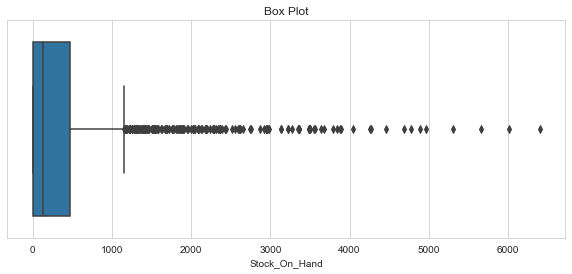

In [31]:
Box_plots(df_train['Stock_On_Hand'])

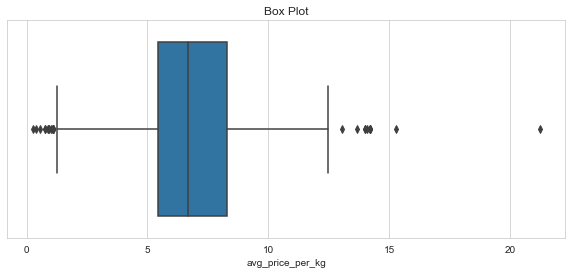

In [32]:
Box_plots(df_train['avg_price_per_kg'])

In [33]:
df_train.head(1)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_n,Container_n,Size_Grade_n
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,8,0


In [34]:
df_test.head(1)

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_n,Container_n,Size_Grade_n
0,1,12.0,128.0,136.0,5008.0,38,456.0,0,5,2,1


In [15]:
#create a linear reggression class object
model = LinearRegression()

In [16]:
#define the variables
x = df_train[["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Province_n","Container_n","Size_Grade_n"]]

y = df_train[['avg_price_per_kg']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

In [18]:
#create a linear reggression class object
lin_model = LinearRegression()
#fit method
lin_model.fit(X_train,y_train)

LinearRegression()

In [19]:
predictions = lin_model.predict(X_test)
preds = np.concatenate(predictions) #flatten array
preds

array([ 8.98782564,  6.07167429,  3.19835357,  7.55669424,  6.26165756,
        8.01887557,  7.28837648,  7.69968122,  4.87857612,  7.64183958,
        7.43725041,  6.73762967,  7.79865334,  7.76628787,  8.58176877,
        7.04785196,  7.24912249,  7.96779463,  5.61447919,  7.87776715,
        8.81344204,  4.46490088,  0.48917938,  7.89928649,  6.16405852,
        6.22380013,  5.75489707,  6.05284964,  7.65590399,  7.71086999,
        5.12764416,  6.02175236,  3.90763731,  4.01085008,  6.50639687,
        7.79726315,  4.10150187,  7.67201962,  7.55498408,  7.71536913,
        8.80434165,  3.35147289,  6.98018001,  6.96326411,  5.92014536,
        5.59264939,  7.21235902,  7.51498011,  6.07349155,  6.63748044,
        5.82908435,  7.09732478,  6.98608666,  5.58442734,  5.30691049,
        5.86682565,  7.38591213,  6.30808933,  6.63177624,  5.71369661,
        6.09692888,  6.08088941,  4.36803309,  6.96879973,  6.90087251,
        5.0789178 ,  5.73901725,  7.57799509,  5.45955459,  8.47

In [20]:
print(f'The coefficients are: {lin_model.coef_}\n')
print(f'The intercept is {lin_model.intercept_}')

The coefficients are: [[-1.87811805e-02  8.53076653e-04  2.13908279e-03  7.21370361e-05
  -2.22140801e-03 -3.72684753e-04  7.26307335e-05  8.93549933e-02
   5.72844050e-02 -3.15701174e-01]]

The intercept is [7.52958249]


In [21]:
lin_model.score(X_test, y_test)

0.45142220729314797

# Classification models.

**Knn**

In [22]:
#knn

apple_model = df_train.drop(["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Container_n","Size_Grade_n"], axis=1)

target = apple_model['Province_n']
features = apple_model.drop(['Province_n'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)


clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)
print("training set score : {:.2f}".format(clf.score(X_train, y_train)))
print("test set score: {:.2f}".format(clf.score(X_test, y_test)))

training set score : 0.62
test set score: 0.61


**SVM**

In [23]:
# Linear SVC

svc = LinearSVC(C=211).fit(X_train, y_train)
print("training set score : {:.2f}".format(svc.score(X_train, y_train)))
print("test set score: {:.2f}".format(svc.score(X_test, y_test)))

training set score : 0.36
test set score: 0.34


**Decision Tree Classifier**

In [24]:
appleTree = df_train.drop(["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Container_n","Size_Grade_n"], axis=1)

target = appleTree['Province_n']
features = appleTree.drop(['Province_n'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

tree = DecisionTreeClassifier(max_depth=7, random_state=0).fit(X_train, y_train)

print("training set score : {:.2f}".format(tree.score(X_train, y_train)))
print("test set score: {:.2f}".format(tree.score(X_test, y_test)))

print("feature importances:")
feature_importance = pd.DataFrame(features.keys(), tree.feature_importances_)
print(feature_importance)

training set score : 0.64
test set score: 0.59
feature importances:
                    0
1.0  avg_price_per_kg


# Regression models

In this section we are going to try to predict the price of the apples.

**Decision Tree Regressor**

The tree models usually don't require preprocessing, so we are going to beging with this model

In [25]:
apple_model = df_train.drop(["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Container_n","Size_Grade_n"], axis=1)
target = apple_model['avg_price_per_kg']
features = apple_model.drop(['avg_price_per_kg'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

In [26]:
tree = DecisionTreeRegressor(max_depth=14, random_state=0).fit(X_train, y_train)
print("training set score : {:.2f}".format(tree.score(X_train, y_train)))
print("test set score: {:.2f}".format(tree.score(X_test, y_test)))

print("\n", "feature importances:")
feature_importance = pd.DataFrame(list(features.keys()), tree.feature_importances_)
print(feature_importance.sort_index(ascending=False))

training set score : 0.22
test set score: 0.22

 feature importances:
              0
1.0  Province_n


# Linear models

In [27]:
lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\n", "training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\n", "training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Linear Regression
training set score : 0.02
test set score: -0.01
Ridge

 training set score : 0.02
test set score: -0.01
Lasso

 training set score: 0.00
Test set score: -0.00
Number of features used: 0


**log**

In [28]:
apple_model = df_train.drop(["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Container_n","Size_Grade_n"], axis=1)
target = apple_model['avg_price_per_kg']
features = apple_model.drop(['avg_price_per_kg'], axis=1)

features.iloc[:,0:7] = np.log(features.iloc[:,0:7] + 1)
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\n", "training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\n", "training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Linear Regression
training set score : 0.01
test set score: -0.01
Ridge

 training set score : 0.01
test set score: -0.01
Lasso

 training set score: 0.00
Test set score: -0.00
Number of features used: 0


let's add dummy variables

In [29]:
apple_model = df_train.drop(["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Container_n","Size_Grade_n"], axis=1)
apple_model = pd.get_dummies(apple_model)

target = apple_model['avg_price_per_kg']
features = apple_model.drop(['avg_price_per_kg'], axis=1)

features.iloc[:,0:7] = np.log(features.iloc[:,0:7] + 1)
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\n", "training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\n", "training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Linear Regression
training set score : 0.01
test set score: -0.01
Ridge

 training set score : 0.01
test set score: -0.01
Lasso

 training set score: 0.00
Test set score: -0.00
Number of features used: 0


**xgboost**

In [30]:
X_train = df_train.drop(['avg_price_per_kg'], axis=1)
Y_train = df_train["avg_price_per_kg"]
X_test  = df_test.drop("Index", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1952, 10), (1952,), (685, 10))

In [31]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = xgb.predict(X_test)
y_pred

array([10.7127    , 12.213106  , 10.005927  ,  8.683472  ,  8.145393  ,
        4.6155457 ,  3.645412  ,  7.2271276 ,  8.741584  ,  9.4373455 ,
        5.0232544 ,  5.754971  ,  8.680216  ,  4.358358  ,  4.5183797 ,
        6.0612464 ,  7.0982385 ,  4.5277057 , 10.733308  ,  6.3176665 ,
        6.12521   ,  4.8276367 ,  5.790255  ,  7.7697725 ,  5.5477204 ,
        6.3027353 ,  7.5950603 ,  8.102218  ,  7.597903  ,  7.1560235 ,
        7.85438   ,  5.5768566 ,  9.102304  ,  7.6949954 ,  4.843875  ,
        9.94028   , 10.902665  , 11.3631315 ,  6.4467297 ,  6.716469  ,
        8.357286  ,  7.881278  ,  4.984973  ,  6.1892657 ,  5.603555  ,
        5.136966  ,  5.0050697 ,  5.4566517 ,  6.2108607 ,  4.891721  ,
        1.4852339 ,  6.263884  ,  6.363115  , 13.594087  ,  9.027698  ,
        5.5258794 , 11.915675  ,  9.4165    ,  7.869231  ,  5.8870435 ,
        8.478942  , 11.428304  ,  6.0628552 ,  9.225271  ,  5.8609715 ,
        6.2287893 ,  6.785224  ,  4.9552145 ,  5.542816  ,  7.13

In [33]:
len(y_pred)

685

In [34]:
# Calculating the accuracy
print("Accuracy:",round(xgb.score(X_train, Y_train)*100,2))

Accuracy: 99.92


**Random Forest**

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5)

In [57]:
# Making Predictions
y2_pred = RF.predict(X_test)
y2_pred

array([ 9.83256732, 11.54062797,  9.83256732,  8.32786473,  8.32786473,
        4.49120011,  3.79512949,  8.32786473,  8.34193216,  9.08700059,
        4.36097781,  5.38356134,  8.32786473,  4.01998997,  4.63528433,
        6.15019351,  6.43574314,  4.23876685,  9.95491865,  6.11952293,
        4.8804414 ,  4.6739016 ,  6.02057957,  7.20364685,  5.70137788,
        6.15587284,  7.5084034 ,  8.32786473,  8.32786473,  8.31768536,
        8.32786473,  5.61644599,  9.10106801,  8.32786473,  4.62471043,
        9.57206848, 10.93189393, 11.27297404,  6.10709114,  6.56145627,
        7.78053574,  7.34993696,  6.16417195,  6.2060623 ,  5.70137788,
        4.8397198 ,  4.98890397,  5.70137788,  6.15019351,  4.94279534,
        1.60785029,  6.17213632,  6.44152528, 13.57558961,  8.003371  ,
        6.43790289,  9.83256732,  8.34193216,  8.32786473,  6.64896276,
        7.658895  , 11.24162632,  6.2060623 ,  8.34193216,  6.71132568,
        5.89430147,  6.74930679,  4.80856919,  5.37804626,  8.32

In [58]:
# Calculating the accuracy
print("Accuracy:",round(RF.score(X_train, Y_train)*100,2))

Accuracy: 88.31


In [35]:
f1 = 'model.pkl'
pickle.dump(xgb,open(f1, 'wb'))

In [59]:
df_test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [62]:
submission = pd.DataFrame({
    "Index": df_test["Index"],
    "avg_price_per_kg": y_pred
})
submission.to_csv('submission.csv', index=False)

In [63]:
submission

,Index,avg_price_per_kg
0,1,10.712700
1,2,12.213106
2,3,10.005927
3,4,8.683472
4,5,8.145393
...,...,...
680,681,2.943763
681,682,10.073599
682,683,6.084826
683,684,7.324178
